Loading the data set

In [ ]:
!gdown 1MmVPcvt5PO8UDKnZXrVcom7LrLfQFTQ0

Downloading...
From: https://drive.google.com/uc?id=1MmVPcvt5PO8UDKnZXrVcom7LrLfQFTQ0
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 131MB/s] 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# Exploratory Data Analysis


dropping unnecessary columns

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205723.000000,2.058090e+05,205809.000000
mean,2014.882264,2.271862e+06,2019.628272
std,63.576352,1.180187e+07,1.325187
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.describe(include=object)

,company_hash,email_hash,job_position
count,205765,205809,153261
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43546


creating new feature

In [ ]:
from datetime import datetime
current_year = datetime.now().year
df['orgyear'] = df['orgyear'].apply(lambda x: current_year if x>=current_year else x)

In [ ]:
orgyears = df['orgyear'].unique().tolist()
wrong_years = [x for x in orgyears if x not in range(1920,current_year+1)]
wrong_years

[nan,
 0.0,
 208.0,
 209.0,
 206.0,
 91.0,
 3.0,
 2.0,
 4.0,
 5.0,
 83.0,
 1.0,
 38.0,
 1900.0,
 201.0,
 6.0,
 200.0]

In [ ]:
df['orgyear'] = df['orgyear'].replace([0.0,208.0,209.0,206.0,91.0,3.0,2.0,4.0,5.0,83.0,1.0,38.0,1900.0,201.0,6.0,200],
               [2000,2008,2009,2006,1991,2003,2002,2004,2005,1983,2001,1938,2019,2001,2006,2000])

In [ ]:
df['Year_of_experience'] = current_year - df['orgyear']

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0


# Univariate Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

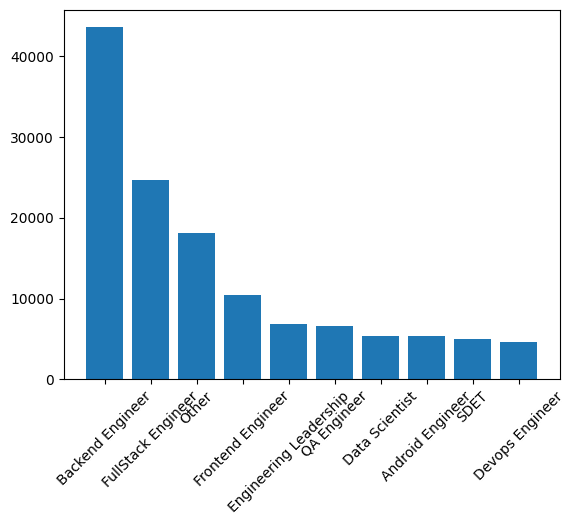

In [ ]:
job_counts = df['job_position'].value_counts()
top_jobs = job_counts.sort_values(ascending=False)[:10]
plt.bar(height=top_jobs, x=top_jobs.index)
x = plt.xticks(rotation=45)

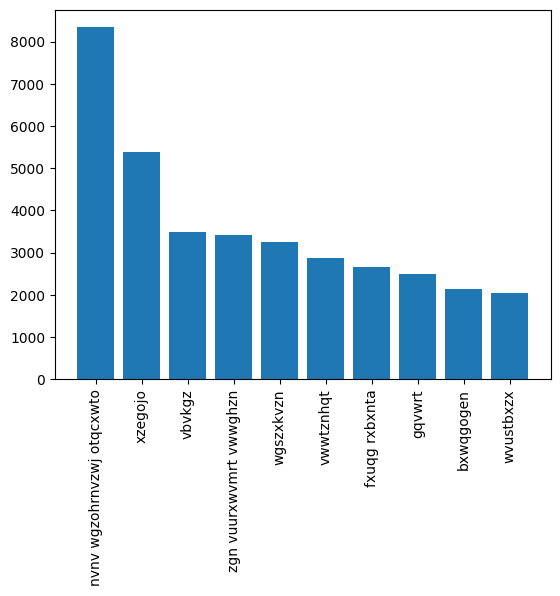

In [ ]:
company_counts = df['company_hash'].value_counts()
top_companies = company_counts.sort_values(ascending=False)[:10]
plt.bar(height = top_companies, x = top_companies.index)
x = plt.xticks(rotation=90)

<Axes: xlabel='Year_of_experience'>

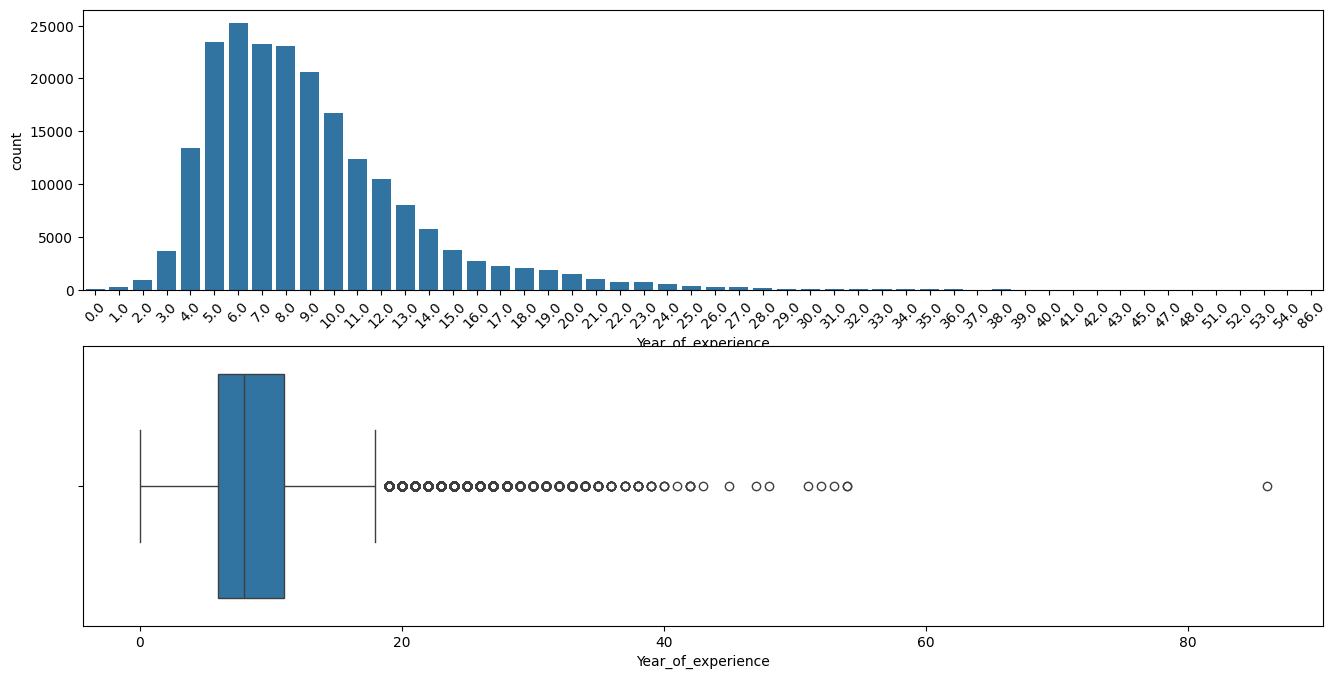

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(data=df, x='Year_of_experience')
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.boxplot(data=df, x='Year_of_experience')

<Axes: xlabel='ctc'>

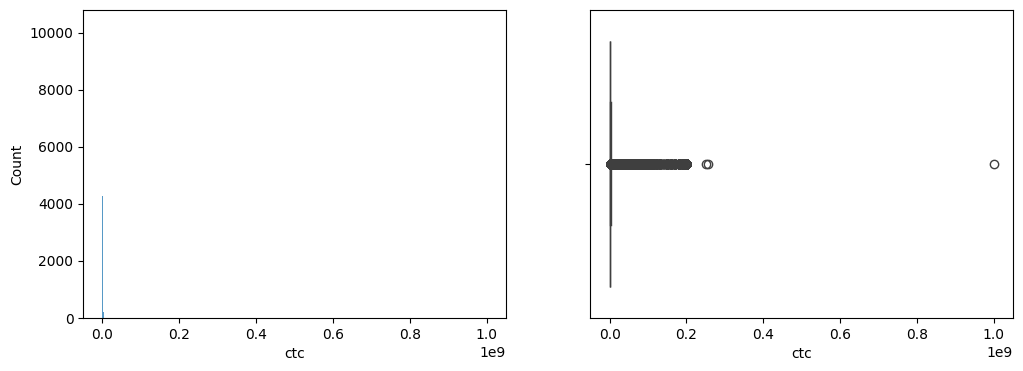

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='ctc')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='ctc')

In [ ]:
import numpy as np

def iqr(ls):
  q1 = np.percentile(ls, 25)
  q3 = np.percentile(ls, 75)
  max_val = ls.max()
  min_val = ls.min()
  range = q3 - q1
  uw = q3+1.5*range
  lw = q1-1.5*range
  upper_bound = min(max_val, uw)
  lower_bound = max(min_val, lw)

  return lower_bound, upper_bound


def treat_outlier(df, feature):
    data = df.copy()
    lb, ub = iqr(data[feature])
    data = data[(data[feature]>=lb) & (data[feature]<=ub)]
    return data

outlier treatment in ctc column



In [ ]:
df_copy = treat_outlier(df=df, feature='ctc')
df_copy.shape

(192683, 7)

<Axes: xlabel='ctc'>

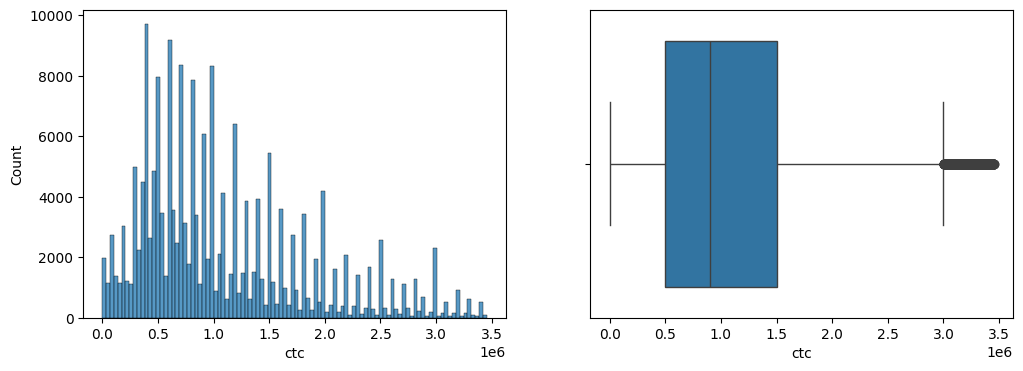

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df_copy, x='ctc')
plt.subplot(1,2,2)
sns.boxplot(data=df_copy, x='ctc')

# Bivariate Analysis

Top 20 Jobs with Highest Avg Pay

<Axes: xlabel='job_position'>

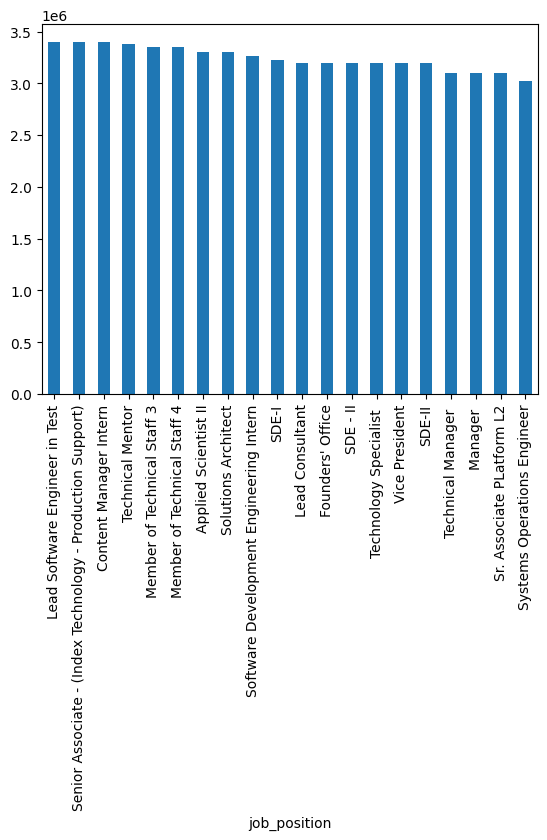

In [ ]:
job_salaries = df_copy.groupby('job_position')['ctc'].mean()
job_salaries.sort_values(ascending=False)[:20].plot(kind='bar')

Top 20 Companies with Highest Salaries

<Axes: xlabel='company_hash'>

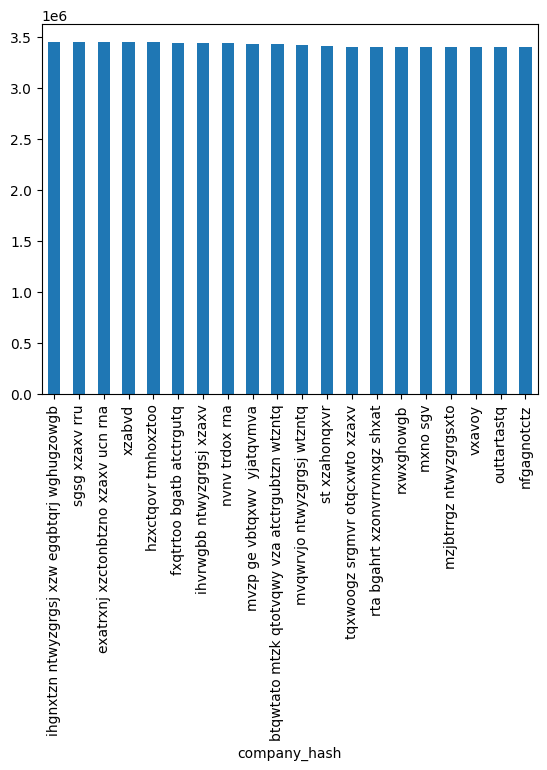

In [ ]:
company_salaries = df_copy.groupby('company_hash')['ctc'].mean()
company_salaries.sort_values(ascending=False)[:20].plot(kind='bar')

Scatterplot between ctc and year of experience

Text(0.5, 1.0, 'corr : 0.32670242293131974')

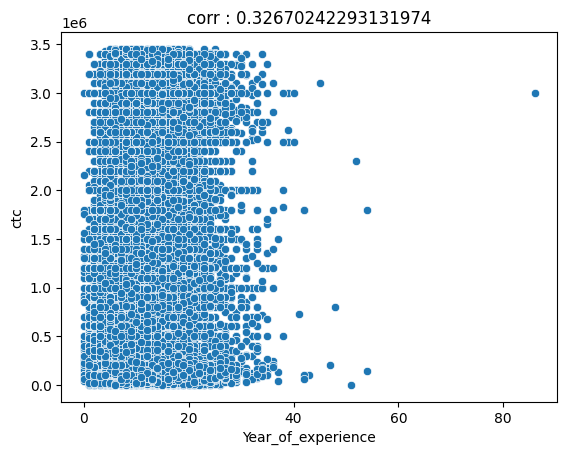

In [ ]:
sns.scatterplot(data=df_copy, x='Year_of_experience', y='ctc')
corr = df_copy['Year_of_experience'].corr(df_copy['ctc'])
plt.title(f'corr : {corr}')

# Manual Clustering

In [ ]:
df_copy['job_position'] = df_copy['job_position'].fillna('unknown')

In [ ]:
df_copy['company_avg'] = df_copy.groupby('company_hash')['ctc'].transform('mean')
df_copy['company_job_avg'] = df_copy.groupby(['company_hash', 'job_position'])['ctc'].transform('mean')
df_copy['company_job_exp_avg'] = df_copy.groupby(['company_hash', 'job_position', 'Year_of_experience'])['ctc'].transform('mean')

In [ ]:
df_copy[['company_avg','company_job_avg', 'company_job_exp_avg']].describe()

,company_avg,company_job_avg,company_job_exp_avg
count,1.926410e+05,1.926410e+05,1.925630e+05
mean,1.084548e+06,1.084548e+06,1.084637e+06
std,5.102446e+05,5.814180e+05,6.657492e+05
min,1.550000e+01,1.550000e+01,1.000000e+01
25%,7.058164e+05,6.474147e+05,5.801923e+05
50%,9.983333e+05,9.500000e+05,9.000000e+05
75%,1.435443e+06,1.449001e+06,1.475000e+06
max,3.450000e+06,3.450000e+06,3.450000e+06


In [ ]:
def flag(x):
  if x<0:
    return 3
  elif x==0:
    return 2
  else:
    return 1

In [ ]:
df_copy['Tier'] = (df_copy['ctc'] - df_copy['company_avg']).apply(flag)
df_copy['Class'] = (df_copy['ctc'] - df_copy['company_job_avg']).apply(flag)
df_copy['designation'] = (df_copy['ctc'] - df_copy['company_job_exp_avg']).apply(flag)

data frame with flags [1,2,3] of Tier, Class, designation

In [ ]:
df_copy

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,1.115667e+06,1.085000e+06,1.100000e+06,3,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,1.071436e+06,9.511363e+05,7.742856e+05,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,2.000000e+06,2.000000e+06,2.000000e+06,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,1.541154e+06,1.416667e+06,1.158571e+06,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,9.400000e+05,8.466667e+05,1.400000e+06,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fe34477c3f64e6ed4301417c8fb9d5e2608722a10f1f4e...,2021.0,800000,unknown,2021.0,3.0,9.053293e+05,9.092817e+05,1.031615e+06,3,3,3
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,unknown,2019.0,16.0,1.568312e+06,1.568312e+06,2.200000e+05,3,3,2
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,unknown,2020.0,7.0,1.267921e+06,1.000769e+06,1.150000e+06,3,3,3
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,unknown,2021.0,3.0,1.368012e+06,1.250342e+06,6.666667e+05,3,3,1


Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
df_copy['emp_ranks_comp'] = df_copy.groupby(['company_hash'])['ctc'].rank(method='dense', ascending=False)
df_copy[(df_copy['emp_ranks_comp']<=10) & (df_copy['Tier']==1)].sort_values(by='company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp
55241,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,Frontend Engineer,2019.0,13.0,5.500000e+05,8.300000e+05,830000.0,1,2,2,1.0
125869,1,a0ece532f193b9e96e6bf92f133de6b2a9c20ebfb0b3bb...,2022.0,250000,Other,2021.0,2.0,1.750000e+05,2.500000e+05,250000.0,1,2,2,1.0
98683,1 jtvq,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,2018.0,1700000,Backend Engineer,2019.0,6.0,1.180000e+06,1.180000e+06,1180000.0,1,1,1,1.0
24386,10nxbto,abf1baa6163b89982e1a66ea5eca355109946e5030f342...,2019.0,500000,unknown,2019.0,5.0,4.275000e+05,5.000000e+05,500000.0,1,2,2,1.0
82978,123ongqto,160c93562f03a86198438f7b0ba964d1031e7b8c13c9d2...,2016.0,2560000,Backend Engineer,2020.0,8.0,1.795000e+06,2.560000e+06,2560000.0,1,2,2,1.0
31590,159 ogrhnxgzo,32b7af6a22321bae56df8b23ed279c1ec83098b2d42690...,2018.0,800000,unknown,2020.0,6.0,6.050000e+05,6.500000e+05,800000.0,1,1,2,1.0
100050,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019.0,620000,Other,2019.0,5.0,6.050000e+05,5.600000e+05,560000.0,1,1,1,2.0
117029,1bs,49c3e07a87bbf5f6e222a3b4844bbd9e64340a76f8c0c4...,2006.0,3400000,unknown,2019.0,18.0,1.417273e+06,1.450000e+06,3400000.0,1,1,2,1.0
25213,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000,unknown,2021.0,11.0,1.417273e+06,1.450000e+06,2000000.0,1,1,2,8.0
151218,1bs,9c02076a74a2b8a64a6e003fa0a2e4115fc717dacb3585...,2016.0,2320000,Backend Engineer,2020.0,8.0,1.417273e+06,1.428333e+06,2320000.0,1,1,2,7.0


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
df_copy['emp_ranks_comp'] = df_copy.groupby(['company_hash'])['ctc'].rank(method='dense')
df_copy[(df_copy['emp_ranks_comp']<=10) & (df_copy['Tier']==3)].sort_values(by='company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp
74429,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,Android Engineer,2019.0,8.0,5.500000e+05,270000.0,270000.0,3,2,2,1.0
2208,1,8cc7aba49e96a0a80f7ed6c2ed79bc1d1e81171a28445c...,2017.0,100000,unknown,2020.0,7.0,1.750000e+05,100000.0,100000.0,3,2,2,1.0
102578,1 jtvq,26a4487b5be40da1e942bf3bc1189172727de0e1c74c5e...,2018.0,660000,Backend Engineer,2019.0,6.0,1.180000e+06,1180000.0,1180000.0,3,3,3,1.0
13271,10nxbto,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,2019.0,410000,FullStack Engineer,2020.0,5.0,4.275000e+05,405000.0,405000.0,3,1,1,2.0
99792,10nxbto,951189c83134ac5394c85c66d0e96f2a0a242f3d99b87d...,2019.0,400000,Frontend Engineer,2020.0,5.0,4.275000e+05,400000.0,400000.0,3,2,2,1.0
108928,10nxbto,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,2019.0,400000,FullStack Engineer,2020.0,5.0,4.275000e+05,405000.0,405000.0,3,3,3,1.0
199012,123ongqto,acecb5f871cc747f6111d5b7527a06839178adfe8ec3fe...,2018.0,1030000,FullStack Engineer,2020.0,6.0,1.795000e+06,1030000.0,1030000.0,3,2,2,1.0
15378,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019.0,500000,unknown,2021.0,5.0,6.050000e+05,650000.0,500000.0,3,3,2,1.0
11124,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019.0,500000,Other,2021.0,5.0,6.050000e+05,560000.0,560000.0,3,3,3,1.0
4276,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000,unknown,2020.0,5.0,1.417273e+06,1450000.0,1030000.0,3,3,3,6.0


In [ ]:
df_copy1 = df_copy[df_copy['job_position'].isin(['Data Analyst', 'Data Scientist', 'Senior Data Engineer', 'Senior data engineer', 'Senior Data Scientist'])].copy()

Top 10 employees of data science in each company earning more than their peers - Class 1

In [ ]:
df_copy1['emp_ranks_comp'] = df_copy1.groupby(['company_hash'])['ctc'].rank(method='dense', ascending=False)
df_copy1[(df_copy1['emp_ranks_comp']<=10) & (df_copy1['Class']==1)].sort_values(by='company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp
139680,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,1100000,Data Scientist,2021.0,6.0,1.417273e+06,9.500000e+05,1100000.0,3,1,2,1.0
90218,247vx,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad...,2008.0,2500000,Data Scientist,2019.0,16.0,1.276623e+06,2.172500e+06,2500000.0,1,1,2,2.0
142703,247vx,9d2537610d57179230806bb77258f63c3134b8fde9aa3a...,2010.0,2600000,Data Scientist,2015.0,14.0,1.276623e+06,2.172500e+06,2600000.0,1,1,2,1.0
164833,3p ntwyzgrgsxto,af617ba27ec944771314f1c2d739b8208d2b3337800f8f...,2018.0,1800000,Data Scientist,2019.0,6.0,1.170000e+06,1.300000e+06,1500000.0,1,1,1,1.0
105831,3rgi,a372713f7d18e6f03b5b469cbd1ddb8145c2688597c528...,2014.0,1710000,Data Scientist,2019.0,10.0,1.218933e+06,1.152500e+06,1710000.0,1,1,2,1.0
13586,3rgi,c27536d2fe174089c62eca78e6e643baef88a6100c1404...,2010.0,1500000,Data Scientist,2021.0,14.0,1.218933e+06,1.152500e+06,1500000.0,1,1,2,2.0
55286,abx exzvzwt ucn rna,312427e90421d0fa2ad12b47b33cac872026635e5340e6...,2016.0,1550000,Data Scientist,2019.0,8.0,1.525000e+06,1.525000e+06,1550000.0,1,1,2,1.0
105203,adw ntwyzgrgsj,61d299a14643f26bfa7f354aeaae22988c74fede90c4e6...,2013.0,900000,Data Analyst,2021.0,11.0,7.925000e+05,5.250000e+05,900000.0,1,1,2,8.0
59357,adw ntwyzgrgsj,8a1e6a36db44c5ed8abe45ae0889577b2454e9025e7079...,2004.0,2350000,Data Scientist,2021.0,20.0,7.925000e+05,1.231667e+06,2350000.0,1,1,2,2.0
55313,adw ntwyzgrgsj,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84...,2008.0,2790000,Data Scientist,2019.0,16.0,7.925000e+05,1.231667e+06,2790000.0,1,1,2,1.0


Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [ ]:
df_copy1['emp_ranks_comp'] = df_copy1.groupby(['company_hash'])['ctc'].rank(method='dense')
df_copy1[(df_copy1['emp_ranks_comp']<=10) & (df_copy1['Class']==3)].sort_values(by='company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp
139680,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,1100000,Data Scientist,2021.0,6.0,1.417273e+06,950000.0,1100000.0,3,1,2,2.0
177963,1bs,eb213c0552effd7fb139395c7838edb8d59773a1cb57a0...,1994.0,800000,Data Scientist,2019.0,30.0,1.417273e+06,950000.0,800000.0,3,3,2,1.0
188855,1stz,3dddd88f7d7ac6ace0dfd4927d881a9d452a3666c692bf...,2017.0,400000,Data Scientist,2019.0,7.0,6.000000e+05,400000.0,400000.0,3,2,2,1.0
135870,247 vx,6f0e6a071f07746754a040485ce7c14304f3ea9047a219...,2018.0,1100000,Data Scientist,2019.0,6.0,1.240000e+06,1100000.0,1100000.0,3,2,2,1.0
159912,3p ntwyzgrgsxto,89901f32acc07b5ca10c4ee5a9afda6de831cb84a0cbeb...,2019.0,1000000,Data Scientist,2019.0,5.0,1.170000e+06,1300000.0,1000000.0,3,3,2,1.0
134842,3rgi,24db964005796c656431df0b035768e8b9cee21f8cf425...,2015.0,600000,Data Scientist,2020.0,9.0,1.218933e+06,1152500.0,600000.0,3,3,2,1.0
190277,3rgi,24db964005796c656431df0b035768e8b9cee21f8cf425...,2015.0,600000,Data Analyst,2020.0,9.0,1.218933e+06,600000.0,600000.0,3,2,2,1.0
143727,3rgi,5c67aa9b1414eb0dc68b6acc70c978f0b429e1f24f32a9...,2018.0,800000,Data Scientist,2019.0,6.0,1.218933e+06,1152500.0,800000.0,3,3,2,2.0
84266,abx exzvzwt ucn rna,3aef83f2dddebbd9ffadfe2e42ad783a04b2607a55ebc1...,2012.0,1500000,Data Scientist,2019.0,12.0,1.525000e+06,1525000.0,1500000.0,3,3,2,1.0
10126,adw ntwyzgrgsj,ad9ad4b731a5152812c4f7fd75058adad2ae604ef05ea1...,2014.0,400000,Data Analyst,2021.0,10.0,7.925000e+05,525000.0,400000.0,3,3,2,1.0


Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
df_copy['emp_ranks_comp_job_exp'] = df_copy.groupby(['company_hash', 'job_position', 'Year_of_experience'])['ctc'].rank(method='dense', ascending=False)
df_copy[(df_copy['emp_ranks_comp_job_exp']<=10) & (df_copy['designation']==1) & (df_copy['Year_of_experience'].isin([5,6,7]))].sort_values(by=['company_hash','job_position']).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp,emp_ranks_comp_job,emp_ranks_comp_job_exp
98683,1 jtvq,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,2018.0,1700000,Backend Engineer,2019.0,6.0,1.180000e+06,1.180000e+06,1.180000e+06,1,1,1,1.0,1.0,1.0
13271,10nxbto,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,2019.0,410000,FullStack Engineer,2020.0,5.0,4.275000e+05,4.050000e+05,4.050000e+05,3,1,1,2.0,1.0,1.0
100050,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019.0,620000,Other,2019.0,5.0,6.050000e+05,5.600000e+05,5.600000e+05,1,1,1,2.0,1.0,1.0
38589,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000,Backend Engineer,2020.0,7.0,1.417273e+06,1.428333e+06,1.218333e+06,3,3,1,16.0,9.0,3.0
151285,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1350000,Backend Engineer,2021.0,5.0,1.417273e+06,1.428333e+06,1.116667e+06,3,3,1,15.0,8.0,1.0
167010,1bs,8eae91898e936449907a20b9eca37a398eb8d5f185f77c...,2017.0,1610000,Backend Engineer,2020.0,7.0,1.417273e+06,1.428333e+06,1.218333e+06,1,1,1,11.0,5.0,1.0
174897,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,1100000,Backend Engineer,2021.0,6.0,1.417273e+06,1.428333e+06,9.333333e+05,3,3,1,18.0,11.0,1.0
174948,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000,Backend Engineer,2021.0,7.0,1.417273e+06,1.428333e+06,1.218333e+06,3,3,1,14.0,7.0,2.0
55095,1bs,49b65f0dfccb9288127bf07ea471f2509678975f796352...,2018.0,1400000,FullStack Engineer,2020.0,6.0,1.417273e+06,1.450000e+06,1.350000e+06,3,3,1,14.0,2.0,1.0
90878,1bs,49b65f0dfccb9288127bf07ea471f2509678975f796352...,2018.0,1400000,unknown,2020.0,6.0,1.417273e+06,1.450000e+06,9.200000e+05,3,3,1,14.0,7.0,1.0


Top 2 positions in every company (based on their CTC)

In [ ]:
df_copy['emp_ranks_comp_job'] = df_copy.groupby(['company_hash', 'job_position'])['ctc'].rank(method='dense', ascending=False)
df_copy[(df_copy['emp_ranks_comp_job']<=2) & (df_copy['Class']==1)].sort_values(by=['company_hash','job_position']).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience,company_avg,company_job_avg,company_job_exp_avg,Tier,Class,designation,emp_ranks_comp,emp_ranks_comp_job,emp_ranks_comp_job_exp
98683,1 jtvq,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,2018.0,1700000,Backend Engineer,2019.0,6.0,1.180000e+06,1.180000e+06,1.180000e+06,1,1,1,1.0,1.0,1.0
13271,10nxbto,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,2019.0,410000,FullStack Engineer,2020.0,5.0,4.275000e+05,4.050000e+05,4.050000e+05,3,1,1,2.0,1.0,1.0
100050,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,2019.0,620000,Other,2019.0,5.0,6.050000e+05,5.600000e+05,5.600000e+05,1,1,1,2.0,1.0,1.0
31590,159 ogrhnxgzo,32b7af6a22321bae56df8b23ed279c1ec83098b2d42690...,2018.0,800000,unknown,2020.0,6.0,6.050000e+05,6.500000e+05,8.000000e+05,1,1,2,1.0,1.0,1.0
136500,1bs,158e0bba9db45a85e623c23b5c66d16e5daadcc8d0e4b4...,2018.0,900000,Android Engineer,2019.0,6.0,1.417273e+06,7.333333e+05,9.000000e+05,3,1,2,20.0,1.0,1.0
78205,1bs,579d9c719cc05b885297256c122585a8f71871f9079c6f...,2015.0,2930000,Backend Engineer,2019.0,9.0,1.417273e+06,1.428333e+06,2.243333e+06,1,1,1,4.0,1.0,1.0
151218,1bs,9c02076a74a2b8a64a6e003fa0a2e4115fc717dacb3585...,2016.0,2320000,Backend Engineer,2020.0,8.0,1.417273e+06,1.428333e+06,2.320000e+06,1,1,2,7.0,2.0,2.0
139680,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,1100000,Data Scientist,2021.0,6.0,1.417273e+06,9.500000e+05,1.100000e+06,3,1,2,18.0,1.0,1.0
165730,1bs,eba7ff1100cfadb14ed1561978f736b0ba2dbb6268aff0...,2006.0,3400000,Engineering Leadership,2019.0,18.0,1.417273e+06,2.500000e+06,3.400000e+06,1,1,2,1.0,1.0,1.0
195174,1bs,4cb6dc15bb6ec13c9e1698f67fa58d04b5a618a0223539...,2012.0,1350000,Frontend Engineer,2018.0,12.0,1.417273e+06,9.666667e+05,1.350000e+06,3,1,2,15.0,1.0,1.0


# Data processing for Unsupervised clustering

In [ ]:
df_copy2 = treat_outlier(df=df, feature='ctc')
df_copy2.shape

(192683, 7)

In [ ]:
df_copy2['company_hash'] = df_copy2['company_hash'].astype(str)

In [ ]:
import re
def clean(mystring):
  return re.sub('[^A-Za-z0-9 ]+', '', mystring)

df_copy2['company_hash'] = df_copy2['company_hash'].apply(clean)

Target Encoding

In [ ]:
df_encoded = df_copy2.copy()
df_encoded['company_hash'] = df_copy2.groupby('company_hash')['ctc'].transform('mean')
df_encoded['email_hash'] = df_copy2.groupby('email_hash')['ctc'].transform('mean')
df_encoded['job_position'] = df_copy2.groupby('job_position')['ctc'].transform('mean')

In [ ]:
df_encoded.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience
0,1.115667e+06,1100000.0,2016.0,1100000,8.390931e+05,2020.0,8.0
1,1.071436e+06,449999.0,2018.0,449999,1.057867e+06,2019.0,6.0
2,2.000000e+06,1775000.0,2015.0,2000000,1.246644e+06,2020.0,9.0
3,1.541154e+06,700000.0,2017.0,700000,1.246644e+06,2019.0,7.0
4,9.400000e+05,1400000.0,2017.0,1400000,1.057867e+06,2019.0,7.0


Standardisation and Missing value imputation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=5))])
X_transformed = pd.DataFrame(pipeline.fit_transform(df_encoded), columns=df_encoded.columns)

In [ ]:
X_transformed.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Year_of_experience
0,0.061043,0.020837,0.168297,0.020613,-1.073506,0.273503,-0.168297
1,-0.025652,-0.854291,0.667226,-0.845121,-0.202853,-0.480152,-0.667226
2,1.794383,0.929623,-0.081167,1.219321,0.548420,0.273503,0.081167
3,0.895020,-0.517703,0.417762,-0.512146,0.548420,-0.480152,-0.417762
4,-0.283273,0.424742,0.417762,0.420183,-0.202853,-0.480152,-0.417762


# KMEANS Clustering

Using elbow method to find best value of k

In [ ]:
from sklearn.cluster import KMeans

# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_transformed)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

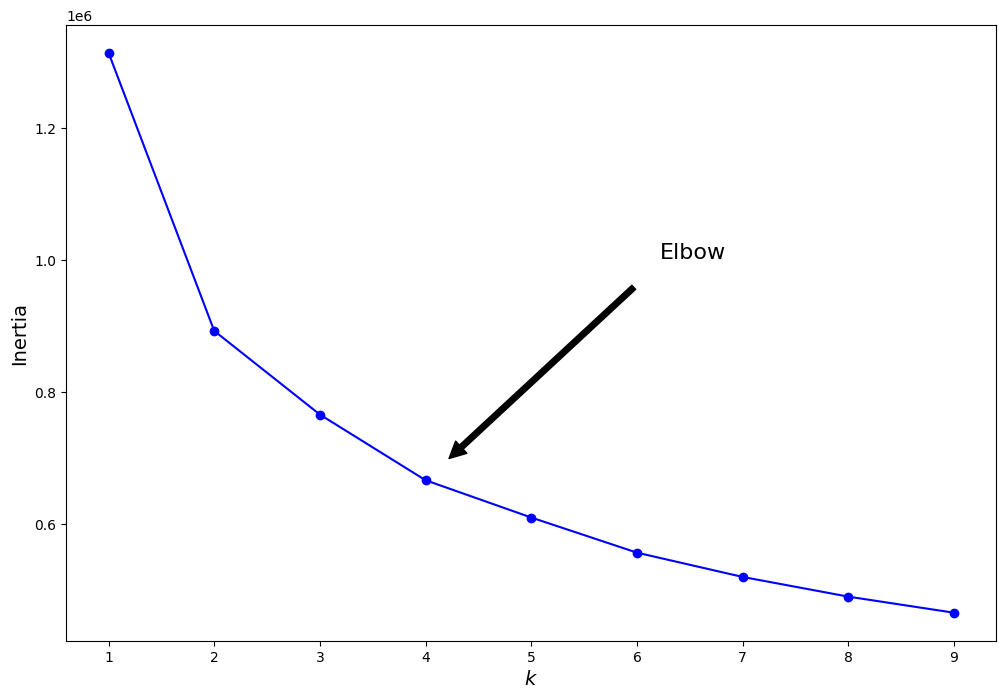

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [ ]:
k = 4 ## from elbow method
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = X_transformed.copy()
clusters['labels'] = y_pred

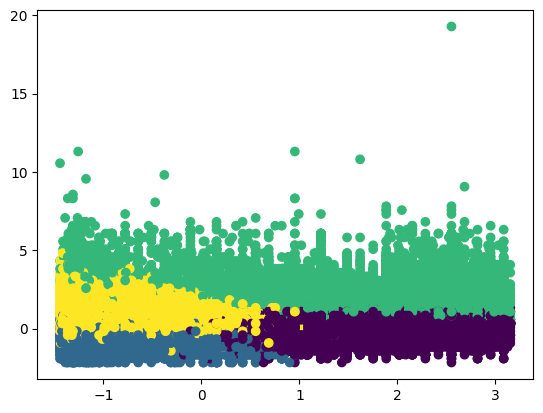

In [ ]:
plt.scatter(clusters['ctc'], clusters['Year_of_experience'], c=clusters['labels'])

Learners can be classified into


*   High experienced irrespective of their current ctc
*   Moderate experienced with low to moderate ctc
*   Low experienced with low ctc
*   low to moderate experienced with high ctc





In [ ]:
polar = clusters.groupby("labels").mean().reset_index()
polar = pd.melt(polar, id_vars=["labels"])
polar.head(4)

,labels,variable,value
0,0,company_hash,1.046899
1,1,company_hash,-0.533570
2,2,company_hash,0.753168
3,3,company_hash,-0.197272


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="labels", line_close=True,height=700,width=800)
fig.show()

# Hierarchical Clustering using a sample of the dataset

In [ ]:
X_samp1 = X_transformed.sample(frac=0.1)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(X_samp1, method='ward') #linkage = ward

plotting a dendogram to determine number of clusters

Text(0, 0.5, 'distance')

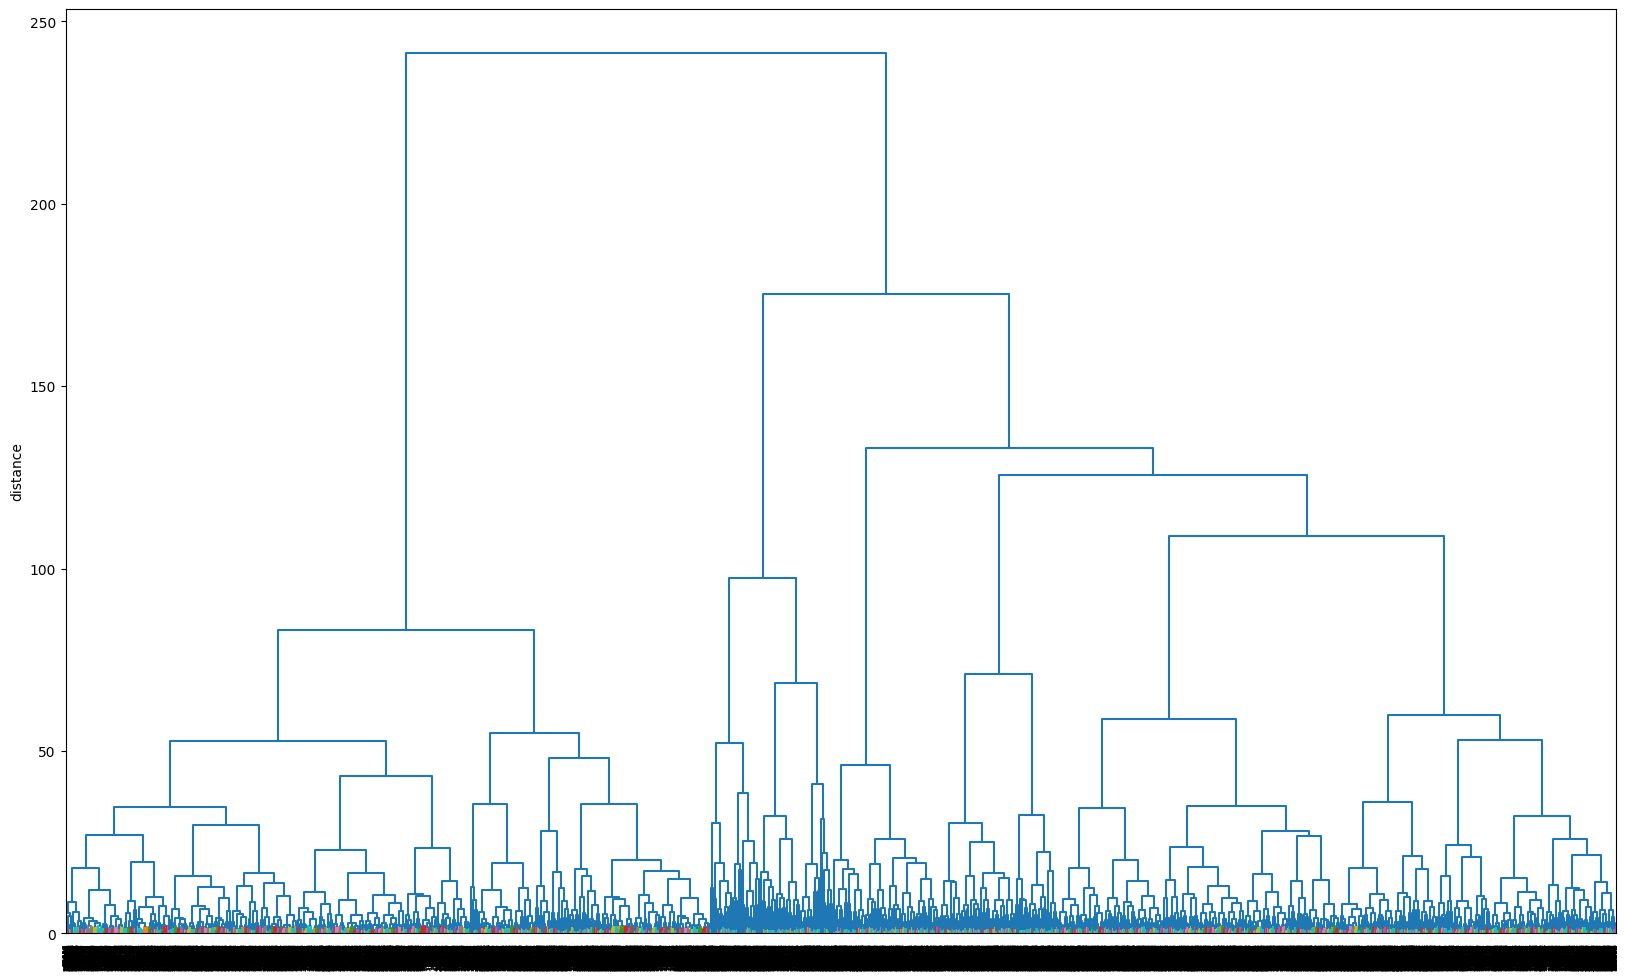

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=X_samp1.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
X_samp = X_transformed.sample(frac=0.1)

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
ac = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_pred = ac.fit_predict(X_samp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



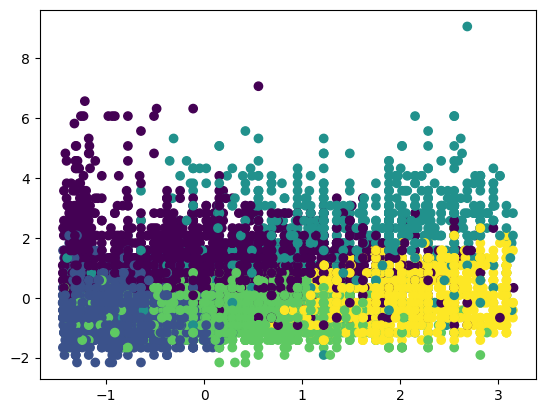

In [ ]:
X_samp['labels'] = y_pred
plt.scatter(X_samp['ctc'], X_samp['Year_of_experience'], c=X_samp['labels'])

Learners can be classified into


*   High experienced with low to moderate ctc
*   High experienced with high ctc
*   Low experienced with moderate ctc
*   Low experienced with low ctc
*   low to moderate experienced with high ctc